In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data

In [232]:
import sklearn
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(0)
n_classes = 4
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                       random_state=2018, n_clusters_per_class=1, n_informative=2,
                       n_classes=n_classes)

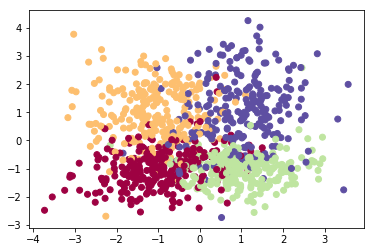

In [221]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

ohe = OneHotEncoder(categories=[range(n_classes)])
Y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
Y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

### Fit model

In [234]:
%autoreload

from deepnn.model import DeepNN
from deepnn.utils.layer import Layer
from deepnn.utils import activations
from deepnn.utils.optimizers import Adam

dnn = DeepNN([
    Layer(7, activation=activations.ReLU),
    Layer(4, activation=activations.ReLU),
    Layer(n_classes, activation=activations.softmax)
], mini_batch_size=64, lr=0.01, num_epochs=100, optimizer=Adam())

costs, relative_errors = dnn.fit(X_train, Y_train, gradient_checking=True)

In [235]:
relative_errors

[(9, 'OK', 5.594502101422792e-11),
 (19, 'OK', 1.6508191075453404e-10),
 (29, 'OK', 5.426409405709458e-11),
 (39, 'OK', 1.2848789143264856e-10),
 (49, 'OK', 3.4567477189397597e-10),
 (59, 'OK', 3.019411336873943e-11),
 (69, 'OK', 5.43298768623654e-11),
 (79, 'OK', 7.313882679959003e-11),
 (89, 'OK', 1.5603388968554275e-10),
 (99, 'OK', 5.462669986514741e-11)]

### Accuracy

In [225]:
from sklearn.metrics import accuracy_score

def decode(x):
    return np.argmax(x, axis=1)

output_train = dnn.predict(X_train)
print(accuracy_score(decode(Y_train), decode(output_train)))
output_test = dnn.predict(X_test)
print(accuracy_score(decode(Y_test), decode(output_test)))

0.81
0.81


In [226]:
from sklearn.metrics import confusion_matrix

confusion_matrix(decode(Y_test), decode(output_test))

array([[17,  3,  2,  3],
       [ 2, 26,  0,  2],
       [ 1,  0, 24,  1],
       [ 1,  2,  2, 14]])

In [227]:
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.show()

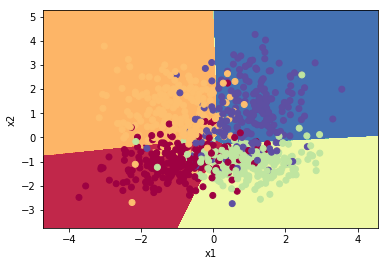

In [228]:
plot_decision_boundary(lambda x: decode(dnn.predict(x)), X_train, decode(Y_train))

### Cost

In [229]:
def cost_stats(costs):
    return pd.DataFrame([[
        np.max(costs),
        np.argmax(costs),
        np.min(costs),
        np.argmin(costs),
        np.mean(costs),
        np.std(costs)
    ]], columns=['max', 'argmax', 'min', 'argmin', 'mean', 'std'])

cost_stats(costs)

,max,argmax,min,argmin,mean,std
0,2.254043,194,0.011962,329,0.580353,0.171058


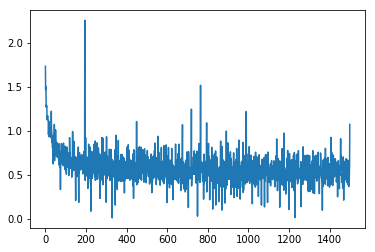

In [231]:
pd.Series(costs).plot()